[I 2025-07-30 14:20:04,280] A new study created in memory with name: no-name-a9d679ad-6fd4-41ce-b08f-447e13030718
[I 2025-07-30 14:20:06,302] Trial 0 finished with value: -0.9309952497474115 and parameters: {'iterations': 601, 'depth': 4, 'learning_rate': 0.1071980630330114, 'l2_leaf_reg': 8.272691484184273, 'bagging_temperature': 0.5635796014746053, 'border_count': 172, 'random_strength': 0.5477597770345469}. Best is trial 0 with value: -0.9309952497474115.
[I 2025-07-30 14:20:08,427] Trial 1 finished with value: -0.9347029853922951 and parameters: {'iterations': 795, 'depth': 7, 'learning_rate': 0.2516312244696939, 'l2_leaf_reg': 2.0841592492938927, 'bagging_temperature': 0.3203798134952228, 'border_count': 190, 'random_strength': 0.7545504728556252}. Best is trial 1 with value: -0.9347029853922951.
[I 2025-07-30 14:20:09,175] Trial 2 finished with value: -0.9338880933556157 and parameters: {'iterations': 204, 'depth': 5, 'learning_rate': 0.27573440394306387, 'l2_leaf_reg': 7.9560790

Best Parameters: {'iterations': 543, 'depth': 5, 'learning_rate': 0.2977187615139856, 'l2_leaf_reg': 8.948596059487919, 'bagging_temperature': 0.4243344973852898, 'border_count': 146, 'random_strength': 0.12785891174087505}

🔍 Optimized CatBoost Performance:
R² Score: 0.9478
Mean Squared Error (MSE): 14.1354
Root Mean Squared Error (RMSE): 3.7597


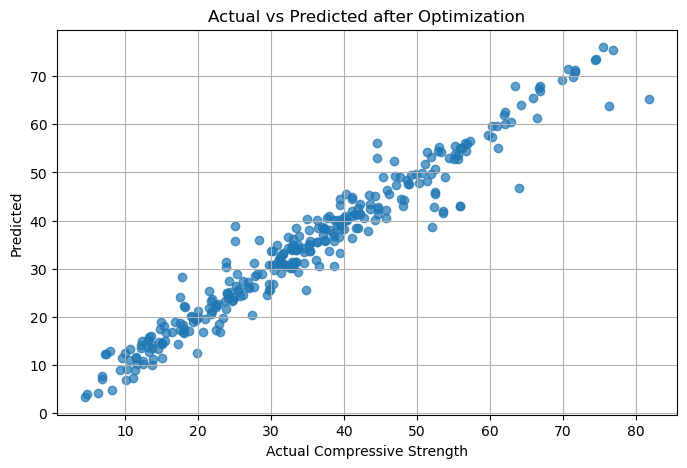

In [33]:
# optimization of catboost model using optuna (trials - 100)
import pandas as pd
import numpy as np
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# 🧱 Load and Split Data
df = pd.read_csv("C:/Users/DELL-7420/Downloads/concrete_data.csv")
X = df.drop(columns=["concrete_compressive_strength", "age_months"], errors='ignore')
y = df["concrete_compressive_strength"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# 🧪 Optuna Objective Function
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 0.0, 1.0),
        "verbose": 0
    }

    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50, verbose=0)
    preds = model.predict(X_valid)
    return -r2_score(y_valid, preds)  # Negative because Optuna minimizes

# 🚀 Run Optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# 🎯 Best Params
best_params = study.best_params
print("Best Parameters:", best_params)

# ✅ Final Model Using Best Params
best_model = CatBoostRegressor(**best_params, verbose=0)
best_model.fit(X_train, y_train)

# 📊 Evaluation
preds = best_model.predict(X_valid)
mse = mean_squared_error(y_valid, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, preds)

print("\n🔍 Optimized CatBoost Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 📈 Visualization
plt.figure(figsize=(8,5))
plt.scatter(y_valid, preds, alpha=0.7)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted after Optimization")
plt.grid(True)
plt.show()


[I 2025-07-30 14:27:04,957] A new study created in memory with name: no-name-7c675f89-2a41-4336-a2d6-7f5e77c25490
[I 2025-07-30 14:27:05,934] Trial 0 finished with value: -0.9275231763158885 and parameters: {'iterations': 369, 'depth': 5, 'learning_rate': 0.0884060968108471, 'l2_leaf_reg': 3.169390803085005, 'bagging_temperature': 0.9336696869720866, 'border_count': 139, 'random_strength': 0.9800021257969804}. Best is trial 0 with value: -0.9275231763158885.
[I 2025-07-30 14:27:07,442] Trial 1 finished with value: -0.9061124332380233 and parameters: {'iterations': 326, 'depth': 6, 'learning_rate': 0.043517592966010495, 'l2_leaf_reg': 7.135829626914373, 'bagging_temperature': 0.1665951784660632, 'border_count': 235, 'random_strength': 0.1781381112313295}. Best is trial 0 with value: -0.9275231763158885.
[I 2025-07-30 14:27:08,381] Trial 2 finished with value: -0.9348041723170262 and parameters: {'iterations': 346, 'depth': 4, 'learning_rate': 0.2265188694364963, 'l2_leaf_reg': 6.1443952


✅ Best Parameters: {'iterations': 1130, 'depth': 4, 'learning_rate': 0.22996398777492078, 'l2_leaf_reg': 5.761905531934682, 'bagging_temperature': 0.5153386160983544, 'border_count': 84, 'random_strength': 0.8982031458226312}

📊 Optimized CatBoost Performance:
R² Score: 0.9480
Mean Squared Error (MSE): 14.0785
Root Mean Squared Error (RMSE): 3.7521


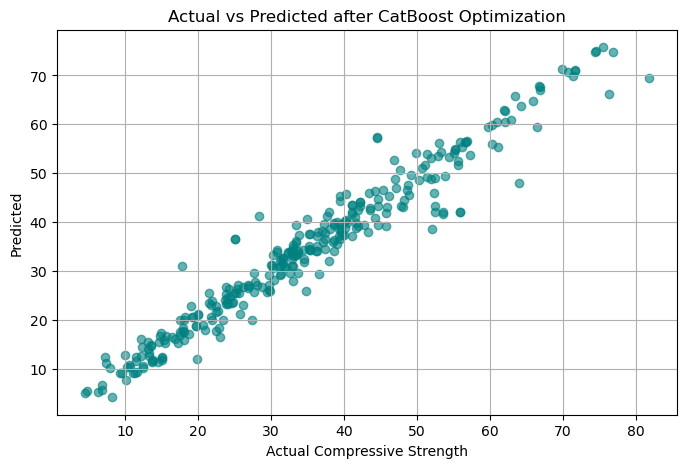

In [35]:
#trails increased 300
import pandas as pd
import numpy as np
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("C:/Users/DELL-7420/Downloads/concrete_data.csv")
X = df.drop(columns=["concrete_compressive_strength", "age_months"], errors='ignore')
y = df["concrete_compressive_strength"]

# Split Data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Optuna Objective
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 300, 1200),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 0.0, 1.0),
        "verbose": 0
    }

    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50, verbose=0)
    preds = model.predict(X_valid)
    return -r2_score(y_valid, preds)

# Optimize with 200 trials
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)

# Best Params and Final Model
best_params = study.best_params
print("\n✅ Best Parameters:", best_params)

final_model = CatBoostRegressor(**best_params, verbose=0)
final_model.fit(X_train, y_train)

# Evaluation
y_pred = final_model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print("\n📊 Optimized CatBoost Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Visualization
plt.figure(figsize=(8,5))
plt.scatter(y_valid, y_pred, color='teal', alpha=0.6)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted after CatBoost Optimization")
plt.grid(True)
plt.show()
